<a href="https://colab.research.google.com/github/AYUSHHUP/Stock_predict/blob/main/stack_prediction_of_MSFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df=pd.read_csv('MSFT.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060524,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062686,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063767,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.062145,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061065,47894400
...,...,...,...,...,...,...,...
9415,2023-07-24,345.850006,346.920013,342.309998,345.109985,345.109985,26678100
9416,2023-07-25,347.109985,351.890015,345.070007,350.980011,350.980011,41637700
9417,2023-07-26,341.440002,344.670013,333.109985,337.769989,337.769989,58383700
9418,2023-07-27,340.480011,341.329987,329.049988,330.720001,330.720001,39635300


In [ ]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
9415,2023-07-24,345.850006,346.920013,342.309998,345.109985,345.109985,26678100
9416,2023-07-25,347.109985,351.890015,345.070007,350.980011,350.980011,41637700
9417,2023-07-26,341.440002,344.670013,333.109985,337.769989,337.769989,58383700
9418,2023-07-27,340.480011,341.329987,329.049988,330.720001,330.720001,39635300
9419,2023-07-28,333.670013,340.010010,333.170013,338.369995,338.369995,28463000


In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060524,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062686,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063767,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.062145,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061065,47894400


In [ ]:
df1=df.reset_index()['Close']
df1

0         0.097222
1         0.100694
2         0.102431
3         0.099826
4         0.098090
           ...    
9415    345.109985
9416    350.980011
9417    337.769989
9418    330.720001
9419    338.369995
Name: Close, Length: 9420, dtype: float64

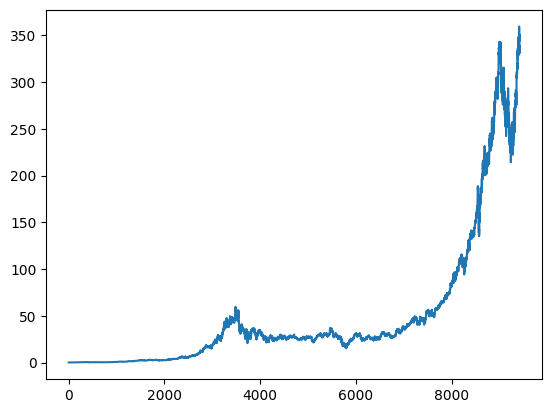

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [ ]:
import numpy as np
df1

0         0.097222
1         0.100694
2         0.102431
3         0.099826
4         0.098090
           ...    
9415    345.109985
9416    350.980011
9417    337.769989
9418    330.720001
9419    338.369995
Name: Close, Length: 9420, dtype: float64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
print(df1)

[[1.93211062e-05]
 [2.89816593e-05]
 [3.38147182e-05]
 ...
 [9.39565892e-01]
 [9.19949883e-01]
 [9.41235359e-01]]


In [ ]:
size=int(len(df1)*0.65)
test_size=len(df1)-size
data,test_data=df1[0:size,:],df1[size:len(df1),:1]
size,test_size

(6123, 3297)

In [ ]:
data

array([[1.93211062e-05],
       [2.89816593e-05],
       [3.38147182e-05],
       ...,
       [7.33159269e-02],
       [7.19525424e-02],
       [7.14517044e-02]])

In [ ]:
import numpy
def create_dataset(dataset, step=1):
    dataA, dataB = [], []
    for i in range(len(dataset)-step-1):
        a = dataset[i:(i+step), 0]
        dataA.append(a)
        dataB.append(dataset[i + step, 0])
    return numpy.array(dataA), numpy.array(dataB)

In [ ]:
step=100
A_train,b_train=create_dataset(data,step)
A_test,b_test=create_dataset(test_data,step)
print(A_train.shape),print(b_train.shape)

(6022, 100)
(6022,)


(None, None)

In [ ]:
print(A_test.shape),print(b_test.shape)

(3196, 100)
(3196,)


(None, None)

In [ ]:
A_train=A_train.reshape(A_train.shape[0],A_train.shape[1],1)
A_test=A_test.reshape(A_test.shape[0],A_test.shape[1],1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(A_train,b_train,validation_data=(A_test,b_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
95/95 [==============================] - 32s 263ms/step - loss: 1.2895e-04 - val_loss: 0.0037
Epoch 2/100
95/95 [==============================] - 25s 261ms/step - loss: 1.5305e-05 - val_loss: 0.0044
Epoch 3/100
95/95 [==============================] - 25s 264ms/step - loss: 1.4319e-05 - val_loss: 0.0044
Epoch 4/100
95/95 [==============================] - 24s 254ms/step - loss: 1.3567e-05 - val_loss: 0.0036
Epoch 5/100
95/95 [==============================] - 24s 255ms/step - loss: 1.2524e-05 - val_loss: 0.0013
Epoch 6/100
95/95 [==============================] - 24s 253ms/step - loss: 1.5417e-05 - val_loss: 0.0036
Epoch 7/100
95/95 [==============================] - 24s 250ms/step - loss: 1.1123e-05 - val_loss: 0.0046
Epoch 8/100
95/95 [==============================] - 24s 253ms/step - loss: 1.0311e-05 - val_loss: 0.0034
Epoch 9/100
95/95 [==============================] - 24s 248ms/step - loss: 9.5891e-06 - val_loss: 0.0032
Epoch 10/100
95/95 [==========================

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.12.0'

In [ ]:
train_predict=model.predict(A_train)
test_predict=model.predict(A_test)

100/100 [==============================] - 4s 43ms/step


In [ ]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(b_train,train_predict))

0.0024214186040130183

In [ ]:
math.sqrt(mean_squared_error(b_test,test_predict))

0.032284835138698634

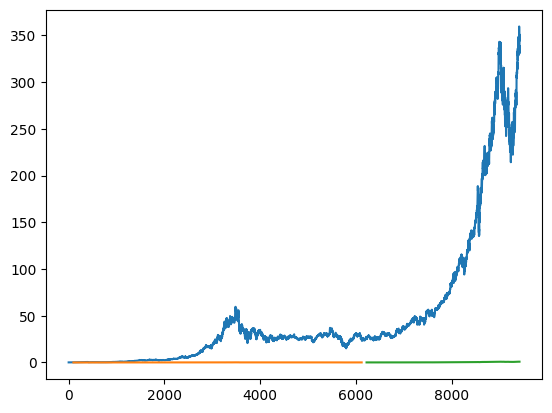

In [ ]:
back=100
trainPredictPlot=numpy.empty_like(df1)
trainPredictPlot[:,:]=np.nan
trainPredictPlot[back:len(train_predict)+back,:]=train_predict
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(back*2)+1:len(df1)-1, :] = test_predict
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(test_data)

3297

In [ ]:
A_input=test_data[3197:].reshape(1,-1)
A_input.shape

(1, 100)

In [ ]:
input=list(A_input)
input=input[0].tolist()

In [ ]:
input

[0.7069001657964601,
 0.7056480863290174,
 0.7018083781881272,
 0.6914299308063998,
 0.7062602209319522,
 0.725375458842883,
 0.7383136801178071,
 0.7682525188000151,
 0.7772396740262274,
 0.7572063190746241,
 0.7615190326028975,
 0.7573732585517486,
 0.7723148258950191,
 0.7804116687772971,
 0.7687533344489713,
 0.765553571172589,
 0.78024473208259,
 0.7900944283450065,
 0.8019197021504569,
 0.7989425795644488,
 0.7988034086126369,
 0.790901351640482,
 0.811101729541731,
 0.8049526122046531,
 0.7866998763760835,
 0.7885362801848878,
 0.8062046471534178,
 0.7959097557651911,
 0.8033109108334511,
 0.8021144908429977,
 0.802337131533372,
 0.7958261997716904,
 0.7948524232540287,
 0.7837505195329706,
 0.7660822360369615,
 0.821591412404916,
 0.8479130584278265,
 0.8546743966227776,
 0.849944253711589,
 0.8495269078011949,
 0.846716638437373,
 0.8495269078011949,
 0.8641067469748,
 0.8585419122428234,
 0.8539509402834469,
 0.8687255709320101,
 0.86260421655541,
 0.8594323052768613,
 0.8607

In [ ]:
from numpy import array
output=[]
n_steps=100
i=0
while(i<30):
  if(len(input)>100):
    A_input=np.array(input[1:])
    print("{} day input {}".format(i,A_input))
    A_input=A_input.reshape(1,-1)
    A_input = A_input.reshape((1, n_steps, 1))
    yh = model.predict(A_input, verbose=0)
    print("{} day output {}".format(i,yh))
    input.extend(yh[0].tolist())
    input=input[1:]
    output.extend(yh.tolist())
    i=i+1
  else:
    A_input=A_input.reshape((1,n_steps,1))
    yh=model.predict(A_input,verbose=0)
    print(yh[0])
    input.extend(yh[0].tolist())
    print(len(input))
    output.extend(yh.tolist())
    i=i+1

print(output)

[0.8447119]
101
1 day input [0.70564809 0.70180838 0.69142993 0.70626022 0.72537546 0.73831368
 0.76825252 0.77723967 0.75720632 0.76151903 0.75737326 0.77231483
 0.78041167 0.76875333 0.76555357 0.78024473 0.79009443 0.8019197
 0.79894258 0.79880341 0.79090135 0.81110173 0.80495261 0.78669988
 0.78853628 0.80620465 0.79590976 0.80331091 0.80211449 0.80233713
 0.7958262  0.79485242 0.78375052 0.76608224 0.82159141 0.84791306
 0.8546744  0.84994425 0.84952691 0.84671664 0.84952691 0.86410675
 0.85854191 0.85395094 0.86872557 0.86260422 0.85943231 0.86079566
 0.86713957 0.87342786 0.88600436 0.88550354 0.8934056  0.87693374
 0.87301052 0.90659431 0.92598777 0.92131324 0.91346689 0.92512514
 0.93297158 0.9344741  0.92818582 0.89952695 0.90475791 0.909015
 0.92309403 0.92988314 0.93836947 0.96830831 0.95225371 0.94034497
 0.92785194 0.94496379 0.93191424 0.91405117 0.93066221 0.9342237
 0.93199771 0.94727324 0.94017803 0.94062322 0.94930435 0.9380356
 0.92303833 0.92481911 0.93797998 0.953

In [ ]:
new=np.arange(1,101)
pre=np.arange(101,131)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
len(df1)

9420

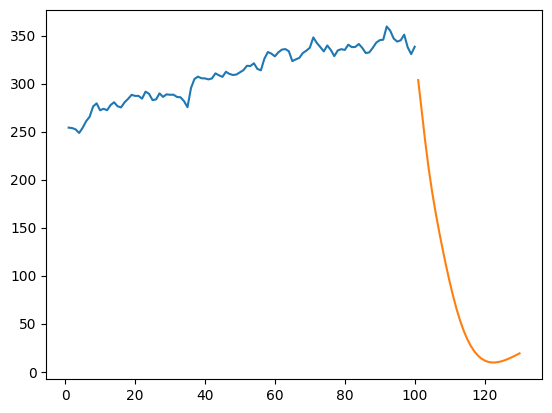

In [ ]:
plt.plot(new,scaler.inverse_transform(df1[9320:]))
plt.plot(pre,scaler.inverse_transform(output))

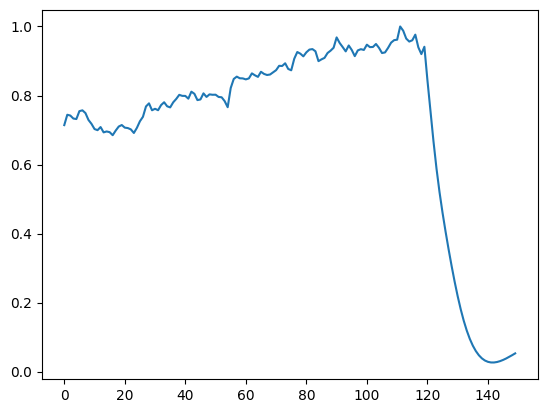

In [ ]:
df5=df1.tolist()
df5.extend(output)
plt.plot(df5[9300:])

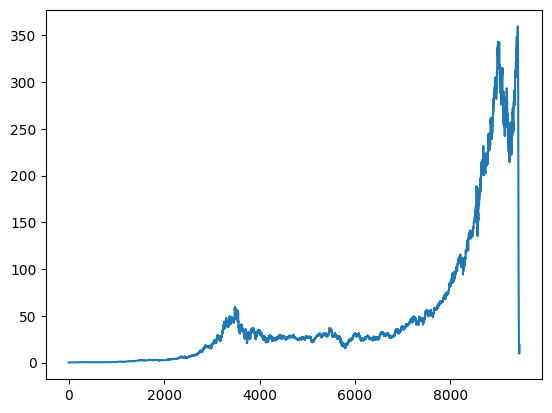

In [ ]:
df5=scaler.inverse_transform(df5).tolist()
plt.plot(df5)